<h3>Import all the required libraries and the data from the excel sheet</h3>

In [1]:
import pandas as pd
import numpy as np
from scipy.stats.distributions import chi2
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel('titanic.xls')
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C


<h3>Q1: a) Count missing values in each column</h3>

In [2]:
def countMissing(data):
    ret = []
    for col in data.columns:
        nulls = 0
        for val in data[col].tolist():
            if pd.isnull(val):
                nulls += 1
        ret.append(nulls)
    return pd.DataFrame(ret, index=data.columns, columns=['nulls'])

countMissing(data)

,nulls
pclass,0
survived,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
embarked,2


<h3>Q1: b) Remove rows/attributes having missing values and calculate the ratio with respect to original data</h3>

<h4>Part 1: When removing Columns with missing data:</h4>

In [3]:
def removeRows(data):
    nul = []
    for col in data.columns:
        for val in data[col].tolist():
            if pd.isnull(val):
                nul.append(col)
                break
    data_copy = data.copy()
    for r in nul:
        data_copy = data_copy.drop(r, axis=1)
    # print ratio of removed columns
    print("Ratio of wrt to original data, when attributes are dropped:", len(data_copy.columns)/len(data.columns))
    return data_copy
removeRows(data)

Ratio of wrt to original data, when attributes are dropped: 0.7


,pclass,survived,name,sex,sibsp,parch,ticket
0,1,1,"Allen, Miss. Elisabeth Walton",female,0,0,24160
1,1,1,"Allison, Master. Hudson Trevor",male,1,2,113781
2,1,0,"Allison, Miss. Helen Loraine",female,1,2,113781
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,1,2,113781
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,1,2,113781
...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,1,0,2665
1305,3,0,"Zabour, Miss. Thamine",female,1,0,2665
1306,3,0,"Zakarian, Mr. Mapriededer",male,0,0,2656
1307,3,0,"Zakarian, Mr. Ortin",male,0,0,2670


<h4>Part 2: When removing Rows with missing data:</h4>

In [4]:
def removeCols(data):
    nul = []
    for row in data.itertuples():
        for val in list(row)[1:]:
            if pd.isnull(val):
                nul.append(row[0])
                break
    data_copy = data.copy()
    for r in nul:
        data_copy = data_copy.drop(r, axis=0)
    # print ratio of removed rows
    print("Ratio of wrt to original data, when rows are dropped:", len(data_copy.index)/len(data.index))
    return data_copy
removeCols(data)

Ratio of wrt to original data, when rows are dropped: 0.7967914438502673


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S
...,...,...,...,...,...,...,...,...,...,...
1301,3,0,"Youseff, Mr. Gerious",male,45.5000,0,0,2628,7.2250,C
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C


<h3>Q1: c) Replace missing values (in original file) of age attribute with:</h3>
<ul>
<li>Mean</li>
<li>Median</li>
</ul>


> lets make a generic function which can perform replacing data effectively.

In [5]:
def replace(df, col, property):
    df['filled-'+col] = df[col].fillna(getattr(data[col], property)())
    return df

data = replace(data, 'age', 'mean')
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,filled-age
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,29.000000
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,0.916700
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,2.000000
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,30.000000
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,25.000000
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,14.500000
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C,29.881135
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,26.500000
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,27.000000


In [6]:
replace(data, 'age', 'median')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,filled-age
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,29.0000
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,0.9167
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,2.0000
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,30.0000
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,25.0000
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,14.5000
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C,28.0000
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,26.5000
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,27.0000


<h3>Q2: WAP to perform transformation of data on age attribute of Titanic dataset using Binning </h3>
<h4> a) With equal width bins using K=25, using mean (you may fill zero value to balance last bin)
<br> b) With equal frequency bins of size 100 using mean (you may fill zero value to balance last bin) </h4>


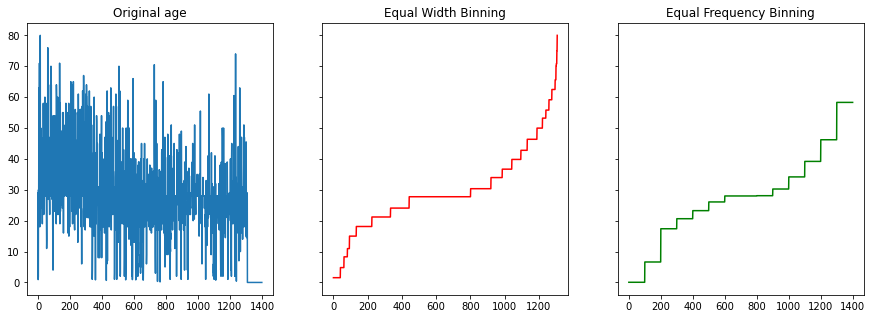

In [7]:
def binningEqualWidth(age, k):
    a = len(age)
    w = (max(age) - min(age))/k
    bins = [min(age) + i*w for i in range(k+1)]
    ret = []
    for i in range(0, k):
        curr = []
        for j in age:
            if j >= bins[i] and j <= bins[i+1]:
                curr.append(j)
        # mean of curr
        ret+=[np.mean(curr)]*len(curr)
    return ret


def binningEqualFrequency(age, size):
    while len(age) % size != 0:
        age.append(0)
    age = sorted(age)
    ret = []
    for i in range(0, len(age), size):
        ret+=[np.mean(age[i:i+size])]*size
    return ret

def binning(li):
    equalWidth = binningEqualWidth(li, 25)
    equalFrequency = binningEqualFrequency(li, 100)
    fig, axs = plt.subplots(1,3, figsize=(15,5), sharey=True)
    axs[0].plot(li, label = 'Original age')
    axs[0].set_title('Original age')
    axs[1].plot(equalWidth, label = 'Equal Width Binning', color = 'red')
    axs[1].set_title('Equal Width Binning')
    axs[2].plot(equalFrequency, label = 'Equal Frequency Binning', color = 'green')
    axs[2].set_title('Equal Frequency Binning')
    plt.show()

binning(data['filled-age'].tolist())


<h3>Q3: Perform chi-square test (also show the contingency table) </h3>
<h4> a) Pclass & Survived (fill missing values with highest frequency category, if any) <br>
 b) Pclass & sex (fill missing values with highest frequency category, if any) <br>
 c) Plass & embarked (fill missing values with highest frequency category, if any) </h4>

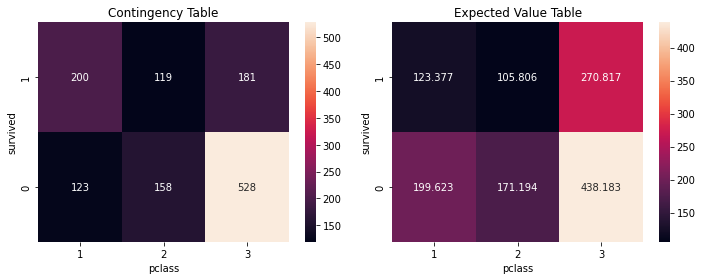

The chi-square value: 127.85915643930326
The degree of freedom: 2
The p-value: 1.7208259588256175e-28


In [8]:
def chiSquareCalc(x, y):
    x = x.fillna(x.mode()[0])
    y = y.fillna(y.mode()[0])
    
    table = {}
    for i in range(len(x)):
        if x[i] in table:
            if y[i] in table[x[i]]:
                table[x[i]][y[i]] += 1
            else:
                table[x[i]][y[i]] = 1
        else:
            table[x[i]] = {}
            table[x[i]][y[i]] = 1
    df = pd.DataFrame(table)
    df['Sum(row)'] = df.sum(axis=1)
    df.loc['Sum(col)'] = df.sum()
    df.columns.name = x.name
    df.index.name = y.name

    df_exp = df.copy()

    for i in range(len(df.columns)-1):
        df_exp.iloc[i, :-1] = df_exp.iloc[-1,:-1]*df_exp.iloc[i, -1]/df_exp.iloc[-1,-1]

    # Plot everything
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.heatmap(df.iloc[:-1, :-1], annot=True, fmt='d')
    plt.title('Contingency Table')
    plt.subplot(1,2,2)
    sns.heatmap(df_exp.iloc[:-1, :-1], annot=True, fmt='g')
    plt.title('Expected Value Table')
    plt.tight_layout()
    plt.show()

    chiSq = np.sum(np.sum(((df.iloc[:-1, :-1] - df_exp.iloc[:-1, :-1])**2/df_exp.iloc[:-1, :-1])))
    print("The chi-square value:", chiSq)
    rows = x.unique()
    cols = y.unique()
    dof = (len(rows)-1)*(len(cols)-1)
    print("The degree of freedom:", dof)
    p = chi2.sf(chiSq, dof)
    print("The p-value:", p)


chiSquareCalc(data['pclass'], data['survived'])

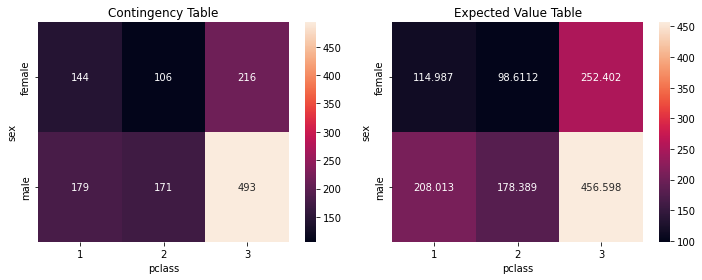

The chi-square value: 20.378781205085584
The degree of freedom: 2
The p-value: 3.7566772719164106e-05


In [9]:
chiSquareCalc(data['pclass'], data['sex'])

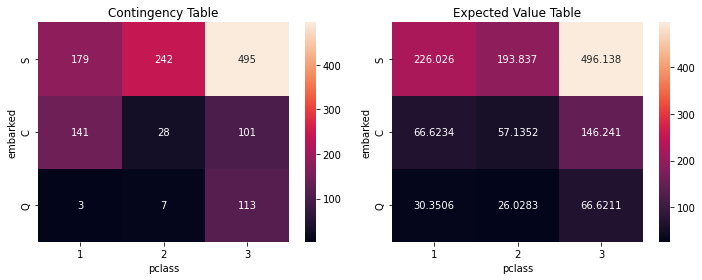

The chi-square value: 204.48431967559742
The degree of freedom: 4
The p-value: 4.0799162291284984e-43


In [10]:
chiSquareCalc(data['pclass'], data['embarked'])

<h3>Q4: Perform correlation analysis</h3>
<h4> a) Age & Fare (first fill missing values using mean, if any) <br> 
b) Age & sibsp (first fill missing values using mean, if any) </h4>

In [11]:
def correlation(x, y):
    x = x.fillna(x.mean())
    y = y.fillna(y.mean())

    r = ((x-x.mean())*(y-y.mean())).sum() / ((x.size-1)*x.std()*y.std())
    plt.scatter(x, y, c=np.random.rand(x.size))
    plt.title("Correlation: "+str(r), fontsize=15)
    plt.show()

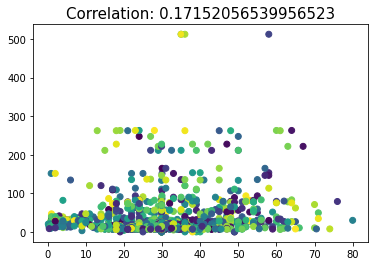

In [12]:
correlation(data['age'], data['fare'])

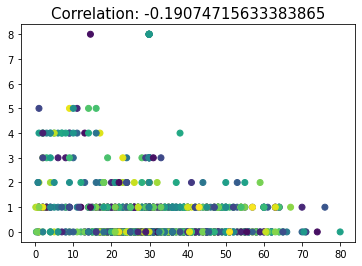

In [13]:
correlation(data['age'], data['sibsp'])

Thank You